In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
 analyticsDeneme.csv	        productPerformanceReport.csv
 cleveland-0_vs_4.dat	        productPerformanceReportEng.csv
 cleveland.xlsx		        regression_cagdas_converted.csv
 Data_Frame_Raw_Data_v1.csv     regression_cagdas_converted.gsheet
 Data_Frame_Raw_Data_v2.csv     states_all.csv
 Data_Frame_Raw_Data_v3.csv     StudentsPerformance.csv
'Data Frame Raw Data v3.xlsx'  'Test (uid-trafficType-shoppingStage).csv'
'Data Frame Raw Data v4.csv'    Titanic
 EvFiyatlari		        weatherHistory.csv
 fifa.csv		        youtube.csv
 insurance.csv


In [63]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
pd.options.display.max_columns = None #kolon ve satır gösterim limitlerini sıfırlamak
pd.options.display.max_rows = None  #kolon ve satır gösterim limitlerini sıfırlamak
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [64]:
original_data = pd.read_excel("cleveland.xlsx")
data=original_data.copy()
original_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.000,6.000,negative
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.000,3.000,negative
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.000,3.000,negative
3,56.000,1.000,2.000,120.000,236.000,0.000,0.000,178.000,0.000,0.800,1.000,0.000,3.000,negative
4,57.000,0.000,4.000,120.000,354.000,0.000,0.000,163.000,1.000,0.600,1.000,0.000,3.000,negative


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       173 non-null    float64
 1   sex       173 non-null    float64
 2   cp        173 non-null    float64
 3   trestbps  173 non-null    float64
 4   chol      173 non-null    float64
 5   fbs       173 non-null    float64
 6   restecg   173 non-null    float64
 7   thalach   173 non-null    float64
 8   exang     173 non-null    float64
 9   oldpeak   173 non-null    float64
 10  slope     173 non-null    float64
 11  ca        173 non-null    float64
 12  thal      173 non-null    float64
 13  num       173 non-null    object 
dtypes: float64(13), object(1)
memory usage: 19.0+ KB


In [66]:
data=pd.get_dummies(data,prefix_sep='_',drop_first=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_positive
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.000,6.000,0
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.000,3.000,0
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.000,3.000,0
3,56.000,1.000,2.000,120.000,236.000,0.000,0.000,178.000,0.000,0.800,1.000,0.000,3.000,0
4,57.000,0.000,4.000,120.000,354.000,0.000,0.000,163.000,1.000,0.600,1.000,0.000,3.000,0


Negatif oranı : %7.51
Positif oranı    : %92.49


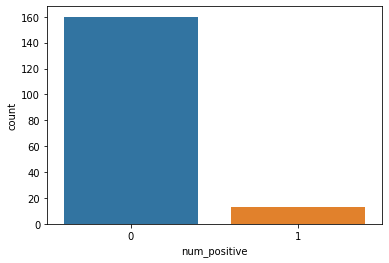

In [67]:
sns.countplot(data.num_positive)
print("Negatif oranı : %{:.2f}".format(sum(data.num_positive)/len(data.num_positive)*100))
print("Positif oranı    : %{:.2f}".format((len(data.num_positive)-sum(data.num_positive))/len(data.num_positive)*100))

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
def model_olustur(X, Y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [70]:
X = data.drop('num_positive', axis=1)
Y = data['num_positive']
model_olustur(X,Y)

Modelin doğruluk değeri :  0.9428571428571428
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       128
           1       1.00      0.60      0.75        10

    accuracy                           0.97       138
   macro avg       0.98      0.80      0.87       138
weighted avg       0.97      0.97      0.97       138

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.33      0.50         3

    accuracy                           0.94        35
   macro avg       0.97      0.67      0.73        35
weighted avg       0.95      0.94      0.93        35



In [71]:
from sklearn.utils import resample

In [72]:
negative = data[data.num_positive == 0] #Azaltılmış
positive = data[data.num_positive == 1]

positive_azaltılmış = resample(negative ,
                                     replace = True,
                                     n_samples = len(positive),
                                     random_state = 111)

azaltılmış_data = pd.concat([positive, positive_azaltılmış])
azaltılmış_data.num_positive.value_counts()

1    13
0    13
Name: num_positive, dtype: int64

In [73]:
X = azaltılmış_data.drop('num_positive', axis=1)
Y = azaltılmış_data['num_positive']
model_olustur(X,Y)

Modelin doğruluk değeri :  1.0
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [75]:
negative = data[data.num_positive == 0]
positive = data[data.num_positive == 1]

positive_arttırılmış = resample(positive ,
                                     replace = True,
                                     n_samples = len(negative),
                                     random_state = 111)

arttırılmış_data = pd.concat([negative, positive_arttırılmış])
arttırılmış_data.num_positive.value_counts()

1    160
0    160
Name: num_positive, dtype: int64

In [78]:
X = arttırılmış_data.drop('num_positive', axis=1)
Y = arttırılmış_data['num_positive']
model_olustur(X,Y)

Modelin doğruluk değeri :  0.953125
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       128
           1       0.95      1.00      0.97       128

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64



In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
Y = data.num_positive
X = data.drop('num_positive', axis=1)

sm = SMOTE(random_state=27, ratio=1.0)
X_smote, y_smote = sm.fit_sample(X, Y)

In [81]:
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.953125
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.96      1.00      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



In [82]:
from imblearn.over_sampling import ADASYN

In [83]:
Y = data.num_positive
X = data.drop('num_positive', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, Y)

In [84]:
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.921875
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       128
           1       0.96      0.99      0.98       127

    accuracy                           0.98       255
   macro avg       0.98      0.98      0.98       255
weighted avg       0.98      0.98      0.98       255

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.91      0.94      0.92        32

    accuracy                           0.92        64
   macro avg       0.92      0.92      0.92        64
weighted avg       0.92      0.92      0.92        64

